# Algoritmo para encontrar Inliers

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Definir la funcion y graficar la distribucion

$$
f(x) = \frac{\sin(x)}{x} \cdot \cos(5x)
$$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


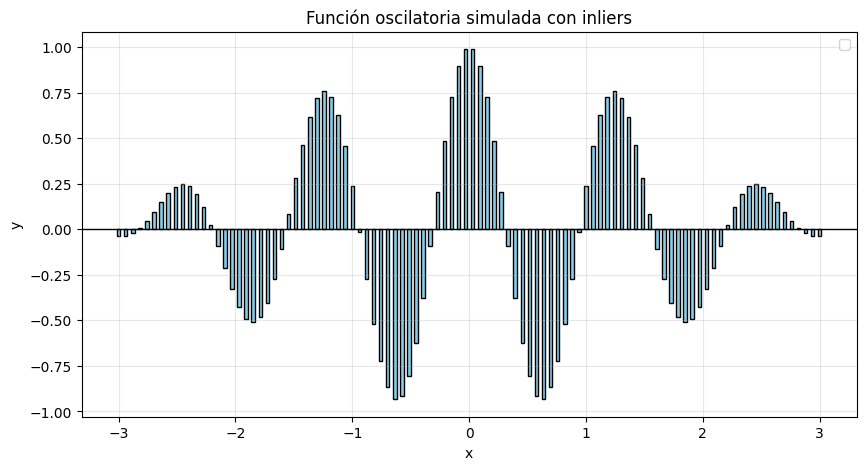

In [183]:
# Generar los datos
x = np.linspace(-3, 3, 100)  # eje x
y = np.cos(5 * x) * np.sin(x)/x  # función oscilatoria 

# Crear dataset en un DataFrame
df = pd.DataFrame({"x": x, "y": y})

# Graficar la función
plt.figure(figsize=(10, 5))
plt.bar(x, y, width=0.03, align="center", color="skyblue", edgecolor="black")
plt.title("Función oscilatoria simulada con inliers")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.3)
plt.axhline(0, color="black", linewidth=1)  # línea en y=0
plt.legend()
plt.show()

## Generar Inliers artificiales

In [184]:
df['y'].max(), df['y'].min()

(0.9883922363593547, -0.9331049457760087)

In [185]:
CANTIDAD_INLIERS = 5
indices_aletarios = []
cantidad = 0
while cantidad < CANTIDAD_INLIERS:
    aletorio = np.random.randint(0, 100)
    if aletorio not in indices_aletarios:
        indices_aletarios.append(aletorio)
        cantidad += 1
indices_aletarios, len(indices_aletarios)

([92, 25, 52, 72, 80], 5)

In [186]:
df_inliers = df.copy()
for i in indices_aletarios:
    #df_inliers.loc[i, 'x'] = -df_inliers['x'][i]
    print(f"indice {i} = {df_inliers['y'][i]} | ", end='')
    df_inliers['y'][i] = - df_inliers['y'][i]
    print(f"{df_inliers['y'][i]}")

indice 92 = 0.19806566028504624 | -0.19806566028504624
indice 25 = 0.27955434298080517 | -0.27955434298080517
indice 52 = 0.7237274745864632 | -0.7237274745864632
indice 72 = 0.6173764442641654 | -0.6173764442641654
indice 80 = -0.5116333045297942 | 0.5116333045297942


C:\Users\packo\AppData\Local\Temp\ipykernel_21888\2211692888.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_inliers['y'][i] = - df_inliers['y'][i]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


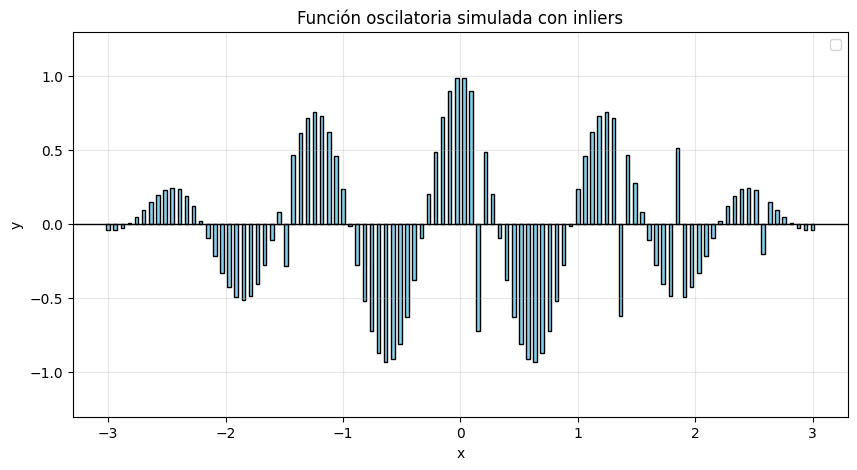

In [187]:
# Graficar la función
plt.figure(figsize=(10, 5))
plt.bar(df_inliers['x'], df_inliers['y'], width=0.03, align="center", color="skyblue", edgecolor="black")
plt.title("Función oscilatoria simulada con inliers")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.3)
plt.axhline(0, color="black", linewidth=1)  # línea en y=0
plt.legend()
plt.ylim(-1.3, 1.3)
plt.xlim(-3.3, 3.3)
plt.show()

In [188]:
def obtener_signo(numero):
    if numero == 0:
        return ''
    if numero > 0:
        return '+'
    if numero < 0:
        return '-'

In [198]:
indices_inliers = []
for i in range(len(df_inliers) - 2):
    vecinoIzq = df_inliers['y'][i]
    centro = df_inliers['y'][i + 1]
    vecinoDer = df_inliers['y'][i + 2]
    if obtener_signo(vecinoIzq) == obtener_signo(vecinoDer) and obtener_signo(centro) != obtener_signo(vecinoDer):
        print(round(vecinoIzq, 4), round(centro, 4), round(vecinoDer, 4), end='')
        print(f"\ti: {i + 1}")
        indices_inliers.append(i + 1)
        continue


-0.1091 0.0817 -0.2796	i: 24
0.0817 -0.2796 0.4646	i: 25
0.8972 -0.7237 0.4847	i: 52
0.7203 -0.6174 0.4646	i: 72
-0.4831 0.5116 -0.4905	i: 80
0.2331 -0.1981 0.1499	i: 92


In [190]:
indices_aletarios, indices_inliers, set(indices_inliers).intersection(set(indices_aletarios))

([92, 25, 52, 72, 80], [24, 25, 52, 72, 80, 92], {25, 52, 72, 80, 92})

In [191]:
df_inliers_grafica = df_inliers.loc[indices_inliers].copy()
df_inliers_grafica

,x,y
24,-1.545455,0.081743
25,-1.484848,-0.279554
52,0.151515,-0.723727
72,1.363636,-0.617376
80,1.848485,0.511633
92,2.575758,-0.198066


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


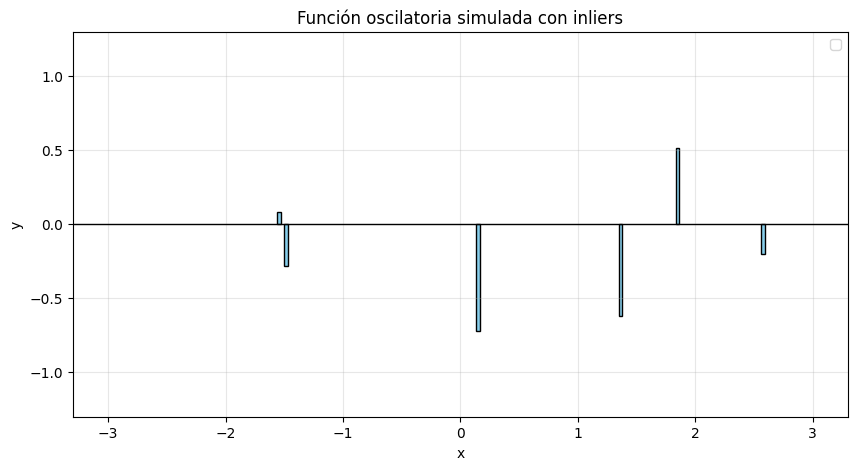

In [192]:
# Graficar la función
plt.figure(figsize=(10, 5))
plt.bar(df_inliers_grafica['x'], df_inliers_grafica['y'], width=0.03, align="center", color="skyblue", edgecolor="black")
plt.title("Función oscilatoria simulada con inliers")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.3)
plt.axhline(0, color="black", linewidth=1)  # línea en y=0
plt.legend()
plt.ylim(-1.3, 1.3)
plt.xlim(-3.3, 3.3)
plt.show()

---

In [193]:
# intento usando los valores evaluados de las funciones (no jala xd)
indices_inliers = []
for i in range(len(df_inliers) - 2):
    vecinoIzq = df_inliers['y'][i]
    centro = df_inliers['y'][i + 1]
    vecinoDer = df_inliers['y'][i + 2]
    if vecinoIzq < vecinoDer:
        if not (centro >= vecinoIzq and centro <= vecinoDer):
            indices_inliers.append(i)
            continue
    elif vecinoIzq > vecinoDer:
        if not (centro <= vecinoIzq and centro >= vecinoDer):
            indices_inliers.append(i)
            continue
